       Unnamed: 0           D3        HR  TILT    FQ  OBS  RSRP
0               0  1020.811932  3.605263   5.6  2600    1   -91
1               1  1001.784907  2.740000   5.0  2600    0   -91
2               2   985.119790  2.914894   5.3  2600    0   -93
3               3   971.179180  2.914894   5.3  2600    0   -95
4               4   708.672703  4.151515   8.5  2600    1  -101
...           ...          ...       ...   ...   ...  ...   ...
15991       16016   147.363496  1.377358   7.9  1800    0   -87
15992       16017   144.391828  1.377358   8.0  1800    0   -85
15993       16018   143.401534  1.377358   8.1  1800    0   -82
15994       16019   142.144293  1.327273   7.3  1800    0   -81
15995       16020   142.144293  1.327273   7.3  1800    0   -82

[15996 rows x 7 columns]
       Unnamed: 0           D3        HR  TILT    FQ  OBS  RSRP
0               0  1020.811932  3.605263   5.6  2600    1   -91
1               1  1001.784907  2.740000   5.0  2600    0   -91
2             

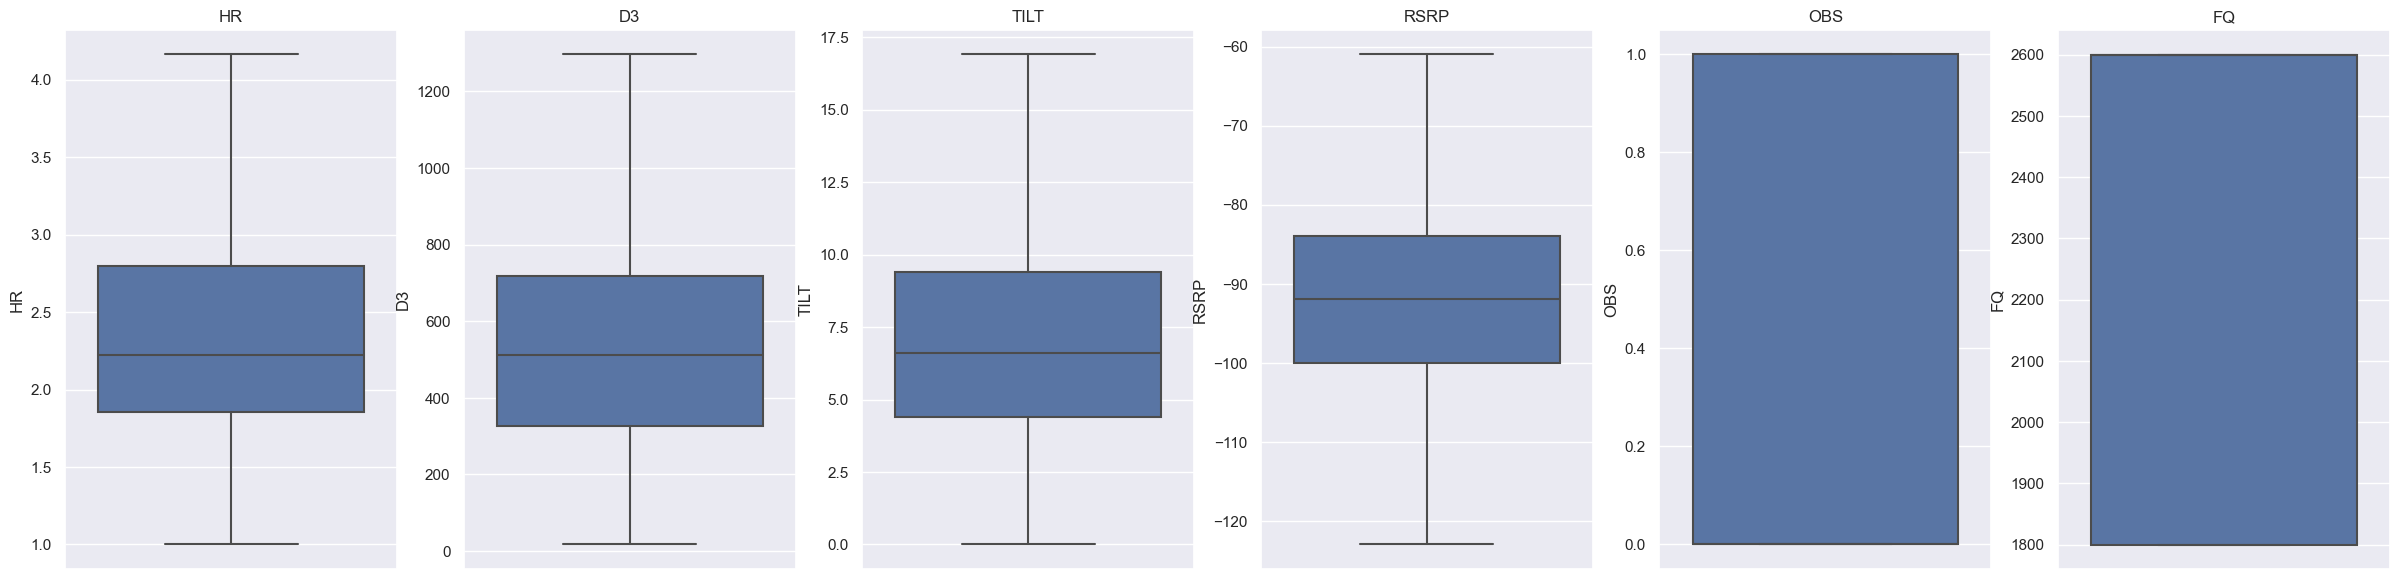

In [42]:
#IQR box and whisker plot เพื่อกำจัด outliers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

sns.set()
# อ่านไฟล์ CSV
df = pd.read_csv("df_outliers_removed4.csv")

# หาค่า Q1, Q3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# คำนวณ IQR
IQR = Q3 - Q1

# หาขอบเขตของ outliers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# กำจัด outliers
df_outliers_removed4 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# พล็อต Subplot ของ boxplot ของแต่ละคอลัมน์

plt.figure(figsize=(30,7))


plt.subplot(1, 6, 1)
sns.boxplot(y='HR', data=df_outliers_removed4)
plt.title('HR')

plt.subplot(1, 6, 2)
sns.boxplot(y='D3', data=df_outliers_removed4)
plt.title('D3')

plt.subplot(1, 6, 3)
sns.boxplot(y='TILT', data=df_outliers_removed4)
plt.title('TILT')

plt.subplot(1, 6, 4)
sns.boxplot(y='RSRP', data=df_outliers_removed4)
plt.title('RSRP')

plt.subplot(1, 6, 5)
sns.boxplot(y='OBS', data=df_outliers_removed4)
plt.title('OBS')

plt.subplot(1, 6, 6)
sns.boxplot(y='FQ', data=df_outliers_removed4)
plt.title('FQ')

print(df_outliers_removed4)
df_outliers_removed4.to_csv("df_outliers_removed4.csv")

column = df['RSRP']

maximum = column.max()
minimum = column.min()

print(df_outliers_removed4)
print("Max:", maximum)
print("Min:", minimum)